# Getting People Ready for the Match 

In [61]:
import numpy as np 
import pandas as pd
import sqlite3
import seaborn as sns
import statistics as st
import matplotlib as mp


# Getting the Data, and Cleaning 

In [62]:
conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()
cur.execute("select * from player_attributes")
df=pd.DataFrame(cur.fetchall())
df.dropna(axis=0, inplace=True)


In [63]:
df.head()
list_Att=[1,10,12,17,34,35,36,37,38,40,41]
df_new=df[list_Att]
df_new.columns=["PlayerID","Finishing", "Short Passing", "Long Passing", "Marking", "Standing Tackle", "Sliding Tackle", "Diving", "Handling", "Positioning", "Reflexes"]
df_new=df_new.groupby("PlayerID",axis=0).mean()
df_new

,Finishing,Short Passing,Long Passing,Marking,Standing Tackle,Sliding Tackle,Diving,Handling,Positioning,Reflexes
PlayerID,,,,,,,,,,
2,48.033333,71.200000,69.200000,71.466667,74.000000,72.833333,13.300000,7.633333,11.766667,13.466667
6,18.000000,28.750000,55.250000,24.750000,24.125000,17.000000,71.750000,72.375000,75.250000,72.750000
11,54.352941,71.882353,66.764706,45.117647,49.588235,58.941176,6.000000,7.058824,7.470588,11.882353
16,73.937500,68.750000,56.437500,27.062500,31.062500,21.000000,9.250000,13.625000,12.937500,12.562500
27,69.833333,80.133333,68.433333,37.133333,36.200000,29.333333,8.333333,7.666667,16.033333,8.333333
28,17.850000,21.100000,35.000000,16.900000,17.800000,14.350000,68.950000,67.900000,71.150000,73.800000
41,72.680000,93.880000,89.000000,58.240000,59.680000,56.000000,6.760000,14.720000,14.520000,10.000000
58,21.913043,63.260870,66.304348,73.782609,78.869565,76.260870,7.521739,14.391304,10.913043,10.217391
61,52.500000,64.625000,45.750000,24.750000,25.750000,31.000000,9.875000,16.125000,14.750000,14.625000


So, the data contains rating from various matches for each player in the database. I have taken the average rating for each attribute, for each player.

# Train and Test Split 

In [64]:
from sklearn.model_selection import train_test_split
X=df_new

X_train, Xtest = train_test_split(X, random_state=42)
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {}".format(X_train.shape))
print("Shape of X_test is {} ".format(Xtest.shape))

train_corpus = list(X_train)


Shape of X is (10410, 10)
Shape of X_train is (7807, 10)
Shape of X_test is (2603, 10) 


# K-Means


We will use K-means with cosine distance as similarity,as Euclidean distance is unlikely to be good measure for assessing similarity between players. It is enough to normalise all vectors, and then train a K-Means model on the normalised data, since the cosine measure is linearly related to the normalised vectors.

In [65]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
Xn1= pd.DataFrame(preprocessing.normalize(X_train))
kmeans = KMeans(n_clusters=4, random_state=15)
kmeans.fit(Xn1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=15, tol=0.0001, verbose=0)

# Finding out which Cluster corresponds to which postion 

In [66]:
print("For the Training Data: \n")
print(" Strikers - {} \n Midfielders - {} \n Defenders - {} \n Goalkeepers - {}".format(st.mode(kmeans.predict(X_train.loc[X_train['Finishing']>=85])), st.mode(kmeans.predict(X_train.loc[(X_train['Short Passing']>=75) & (X_train['Long Passing']>=85)])), st.mode(kmeans.predict(X_train.loc[(X_train['Sliding Tackle']>=75) & (X_train['Standing Tackle']>=70)])), st.mode(kmeans.predict(X_train.loc[X_train['Diving']>=75]))))
print("\n")
print("For the Test Data \n")
print(" Strikers are labelled: {} \n Midfielders are labelled: {} \n Defenders are labelled: {} \n Goalkeepers are labelled: {}".format(st.mode(kmeans.predict(Xtest.loc[Xtest['Finishing']>=85])), st.mode(kmeans.predict(Xtest.loc[Xtest['Short Passing']>=85])), st.mode(kmeans.predict(Xtest.loc[Xtest['Sliding Tackle']>=85])), st.mode(kmeans.predict(Xtest.loc[Xtest['Diving']>=75]))))


For the Training Data: 

 Strikers - 0 
 Midfielders - 3 
 Defenders - 1 
 Goalkeepers - 2


For the Test Data 

 Strikers are labelled: 0 
 Midfielders are labelled: 3 
 Defenders are labelled: 1 
 Goalkeepers are labelled: 2


# Silhouette Coefficient 

In [67]:
from sklearn.metrics import silhouette_score as S_S
print(S_S(X_train,kmeans.predict(X_train)))#For train Data
S_S(X_test,kmeans.predict(X_test))#For test Data

0.3874347503138606


0.3740043854798564

# Visualising Using TSNE  

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=12, metric='cosine').fit_transform(Xn1)

ready


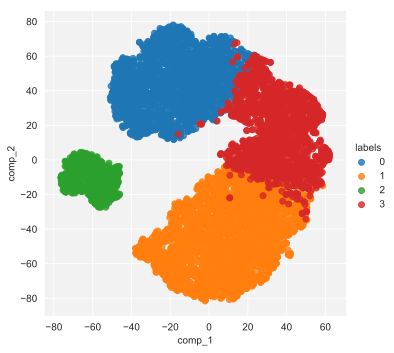

In [69]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'
mp.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(tsne)
proj.columns = ["comp_1", "comp_2"]
proj['labels']=kmeans.labels_
sns.lmplot("comp_1", "comp_2", hue='labels', data = proj,fit_reg=False)
print("ready")